# Descriptive analysis of a single county data
In this script, time series data from a single county is analyzed descriptively.
After this analysis, next step is:
- Use of QNPy for further analysis and prediction on the entire cases or deaths datasets

Import the data and relevant packages:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from scipy.interpolate import interp1d
from MFDFA import MFDFA
from astropy.timeseries import LombScargle
from scipy.fftpack import fft

import warnings
from pandas.core.common import SettingWithCopyWarning
# from pandas.errors import SettingWithCopyWarning # For newer pandas version
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# One county data:
county_cases_df = pd.read_csv(r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_qnpy\6037_cases.csv')

county_deaths_df = pd.read_csv(r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_deaths_qnpy\6037_deaths.csv')

In [3]:
county_cases_df

,mjd,mag,magerr
0,0.0,0.0,0.05
1,1.0,1579.0,0.05
2,2.0,2988.0,0.05
3,3.0,4226.0,0.05
4,4.0,5988.0,0.05
...,...,...,...
217,217.0,937299.0,0.05
218,218.0,937502.0,0.05
219,219.0,937636.0,0.05
220,220.0,937811.0,0.05


In [4]:
county_cases_df.dtypes

mjd       float64
mag       float64
magerr    float64
dtype: object

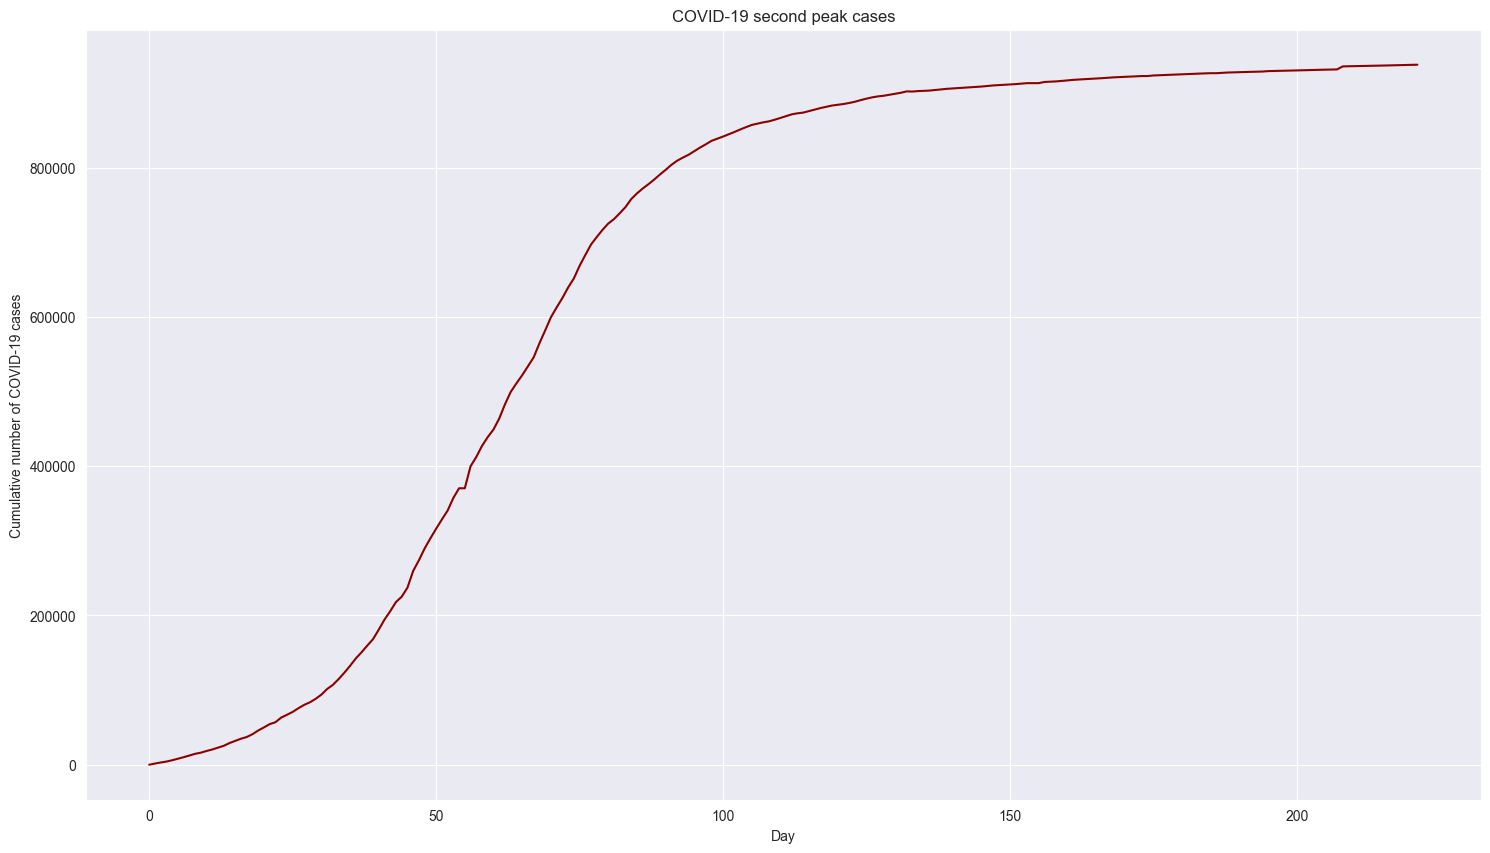

In [5]:
plt.figure(figsize=(18,10))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(county_cases_df.mjd,county_cases_df.mag, color="darkred")
# plt.gcf().autofmt_xdate()
plt.xlabel("Day")
plt.ylabel("Cumulative number of COVID-19 cases")
plt.title("COVID-19 second peak cases")
plt.show()

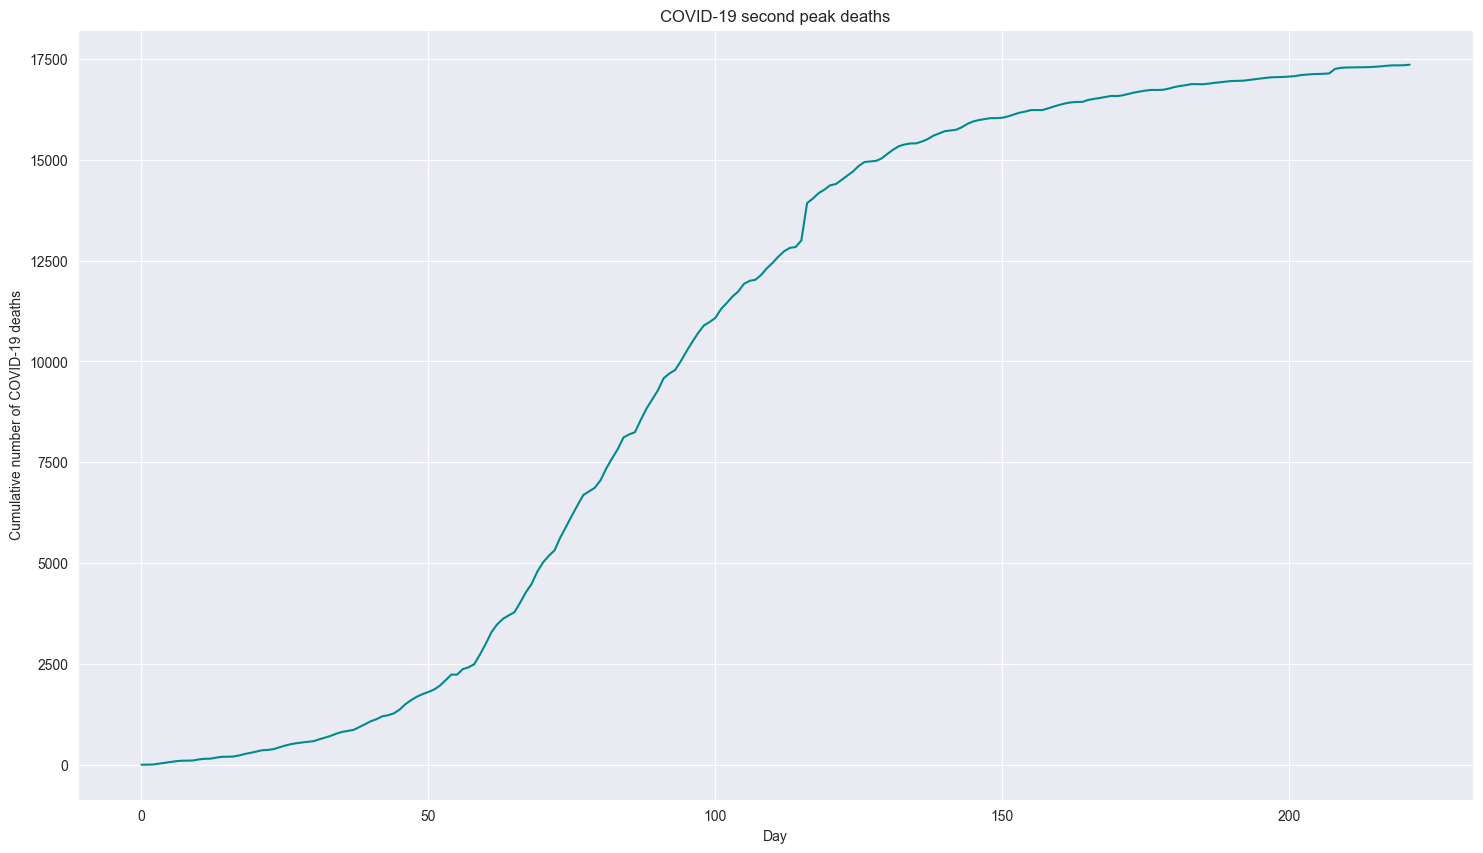

In [6]:
plt.figure(figsize=(18,10))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(county_deaths_df.mjd,county_deaths_df.mag, color="darkcyan")
# plt.gcf().autofmt_xdate()
plt.xlabel("Day")
plt.ylabel("Cumulative number of COVID-19 deaths")
plt.title("COVID-19 second peak deaths")
plt.show()

In [7]:
import astropy.units as u
# If the data is not formatted properly:
t_cumulative_cases = county_cases_df.mjd
y_cumulative_cases = county_cases_df.mag
dy_cumulative_cases = county_cases_df.magerr
frequency, power = LombScargle(t_cumulative_cases, y_cumulative_cases, dy_cumulative_cases).autopower()

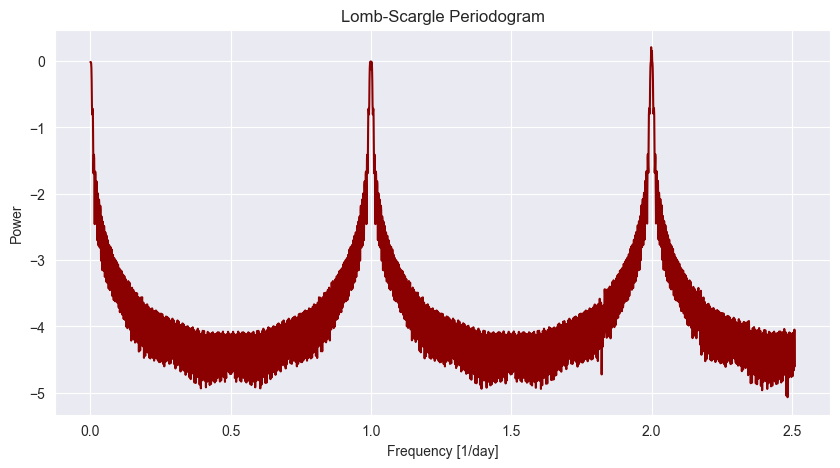

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(frequency, np.log10(power), color="darkred")
plt.title('Lomb-Scargle Periodogram')
plt.xlabel('Frequency [1/day]')
plt.ylabel('Power')
plt.grid(True)
plt.show()

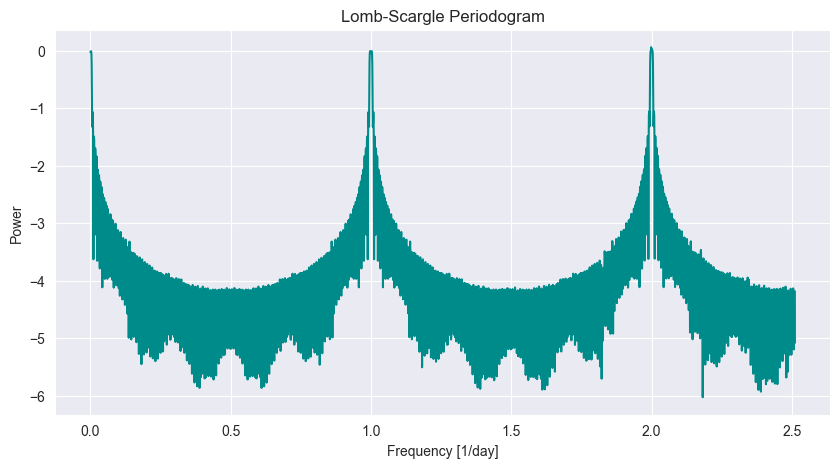

In [9]:
# Cumulative deaths:
t_cumulative_deaths = county_deaths_df.mjd
y_cumulative_deaths = county_deaths_df.mag
dy_cumulative_deaths = county_deaths_df.magerr
frequency, power = LombScargle(t_cumulative_deaths, y_cumulative_deaths, dy_cumulative_deaths).autopower()
plt.figure(figsize=(10, 5))
plt.plot(frequency, np.log10(power), color="darkcyan")
plt.title('Lomb-Scargle Periodogram')
plt.xlabel('Frequency [1/day]')
plt.ylabel('Power')
plt.grid(True)
plt.show()

### Create daily deaths and cases data sets
- it would also be interesting to explore periodicity of daily deaths and cases data

In [10]:
county_deaths_df

,mjd,mag,magerr
0,0.0,0.0,0.05
1,1.0,3.0,0.05
2,2.0,5.0,0.05
3,3.0,26.0,0.05
4,4.0,47.0,0.05
...,...,...,...
217,217.0,17329.0,0.05
218,218.0,17340.0,0.05
219,219.0,17339.0,0.05
220,220.0,17342.0,0.05


In [11]:
def cumulative_to_daily(df):

    df_daily= df.copy()
    for i in range(1, df_daily.shape[0]):
        df_daily.mag[i] = df_daily.mag[i] - df.mag[i-1]
        if df_daily.mag[i] < 0:
            df_daily.mag[i] = 0
    df_daily.mag[0] = 0

    return df_daily

In [12]:
daily_deaths = cumulative_to_daily(county_deaths_df)
daily_deaths

,mjd,mag,magerr
0,0.0,0.0,0.05
1,1.0,3.0,0.05
2,2.0,2.0,0.05
3,3.0,21.0,0.05
4,4.0,21.0,0.05
...,...,...,...
217,217.0,14.0,0.05
218,218.0,11.0,0.05
219,219.0,0.0,0.05
220,220.0,3.0,0.05


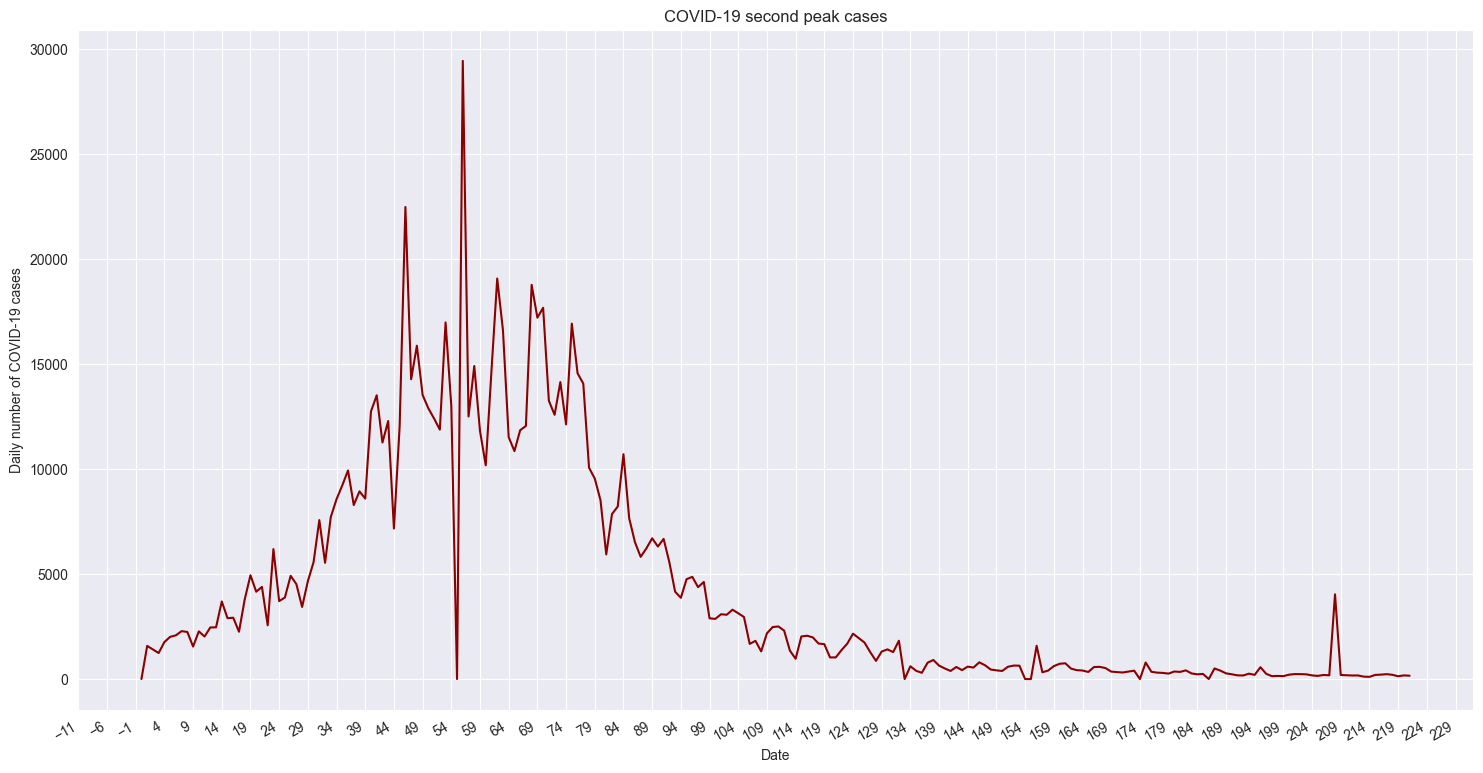

In [13]:
daily_cases = cumulative_to_daily(county_cases_df)
plt.figure(figsize=(18,10))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(daily_cases.mjd,daily_cases.mag, color='darkred')
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Daily number of COVID-19 cases")
plt.title("COVID-19 second peak cases")
plt.show()

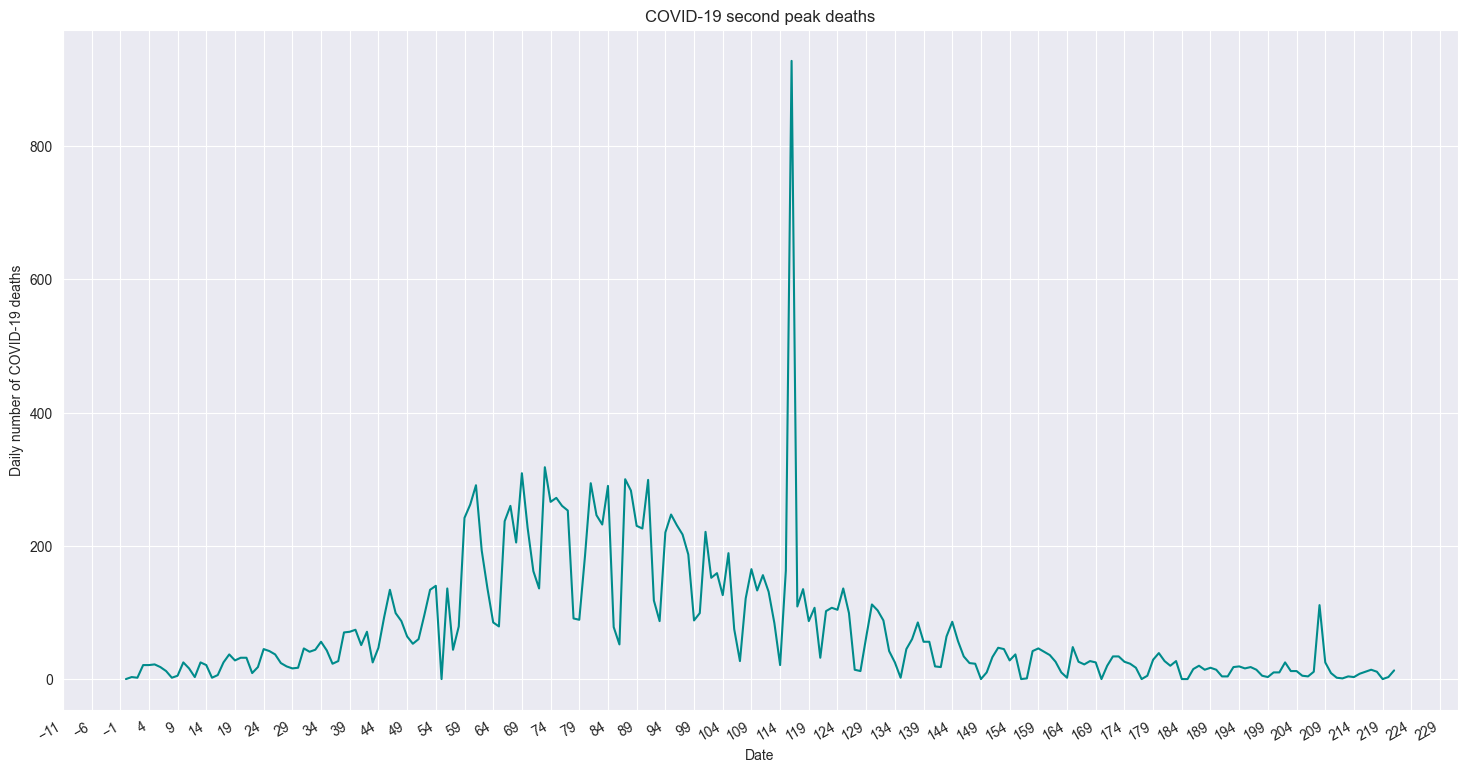

In [14]:
plt.figure(figsize=(18,10))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(daily_deaths.mjd,daily_deaths.mag, color='darkcyan')
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Daily number of COVID-19 deaths")
plt.title("COVID-19 second peak deaths")
plt.show()

It would be interesting to visualize the distribution of number of cases during the peak

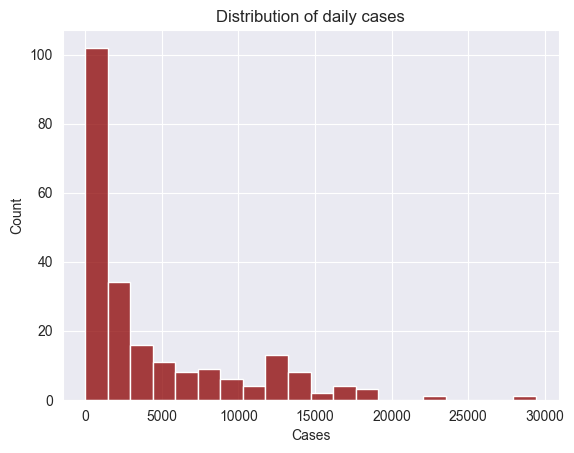

In [15]:
import seaborn as sb
sb.histplot(data = daily_cases, x="mag", bins=20, color="darkred").set(xlabel="Cases", ylabel="Count",title="Distribution of daily cases")
plt.show()

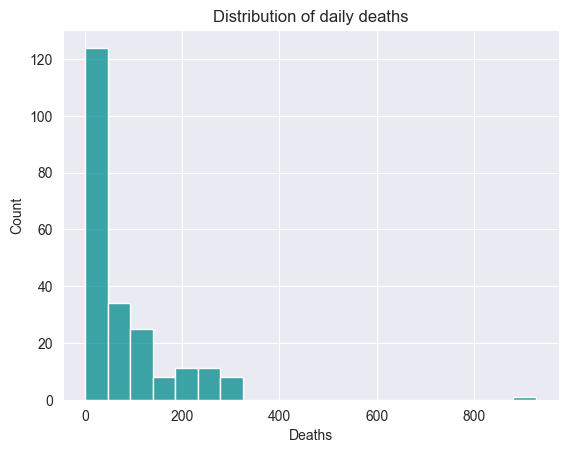

In [16]:
sb.histplot(data = daily_deaths, x="mag", bins=20, color="darkcyan").set(xlabel="Deaths", ylabel="Count",title="Distribution of daily deaths")
plt.show()

C:\Users\marko\AppData\Local\Temp\ipykernel_8564\358578641.py:6: RuntimeWarning: invalid value encountered in log10
  plt.plot(frequency, np.log10(power), color="darkcyan")


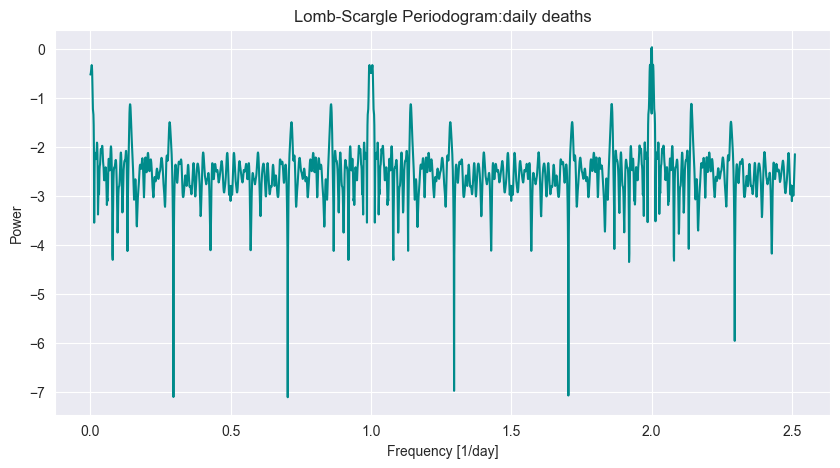

In [17]:
t_daily_deaths = daily_deaths.mjd
y_daily_deaths = daily_deaths.mag
dy_daily_deaths = daily_deaths.mag
frequency, power = LombScargle(t_daily_deaths, y_daily_deaths).autopower()
plt.figure(figsize=(10, 5))
plt.plot(frequency, np.log10(power), color="darkcyan")
plt.title('Lomb-Scargle Periodogram:daily deaths')
plt.xlabel('Frequency [1/day]')
plt.ylabel('Power')
plt.grid(True)
plt.show()

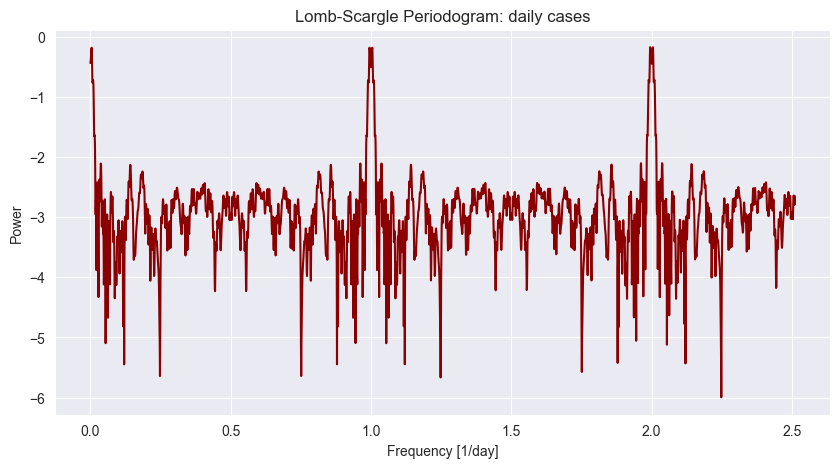

In [18]:
t_daily_cases = daily_cases.mjd
y_daily_cases = daily_cases.mag
frequency, power = LombScargle(t_daily_cases,y_daily_cases).autopower()
plt.figure(figsize=(10, 5))
plt.plot(frequency, np.log10(power), color="darkred")
plt.title('Lomb-Scargle Periodogram: daily cases')
plt.xlabel('Frequency [1/day]')
plt.ylabel('Power')
plt.grid(True)
plt.show()

### Structure function analysis
To study temporal variability and correlation of the data, structure function analysis is used.
It provides information about the variability of a time series on different time scales.



Define structure function

In [19]:
def structure_function(t, y):
    n = len(t)
    delta_t = []
    structure_fun = []

    # Loop over all pairs of data points
    for i in range(n):
        for j in range(i+1, n):
            dt = abs(t[j] - t[i])
            dy = y[j] - y[i]

            delta_t.append(dt)
            structure_fun.append(dy**2)

    # Aggregate over unique delta_t values
    unique_dt = np.unique(delta_t)
    aggregated_sf = []

    for dt in unique_dt:
        indices = np.where(delta_t == dt)
        mean_sf_for_dt = np.sqrt(np.mean(np.array(structure_fun)[indices]))
        aggregated_sf.append(mean_sf_for_dt)

    return unique_dt, aggregated_sf

#### Apply the function to covid-19 cases data

Plot the results (For COVID-19 cases)

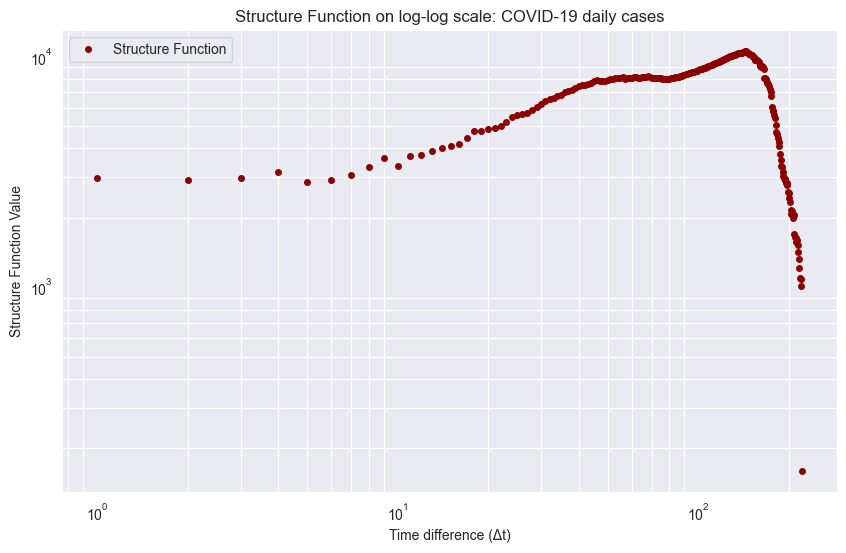

In [20]:
# Plot
delta_ts, SF_values = structure_function(t_daily_cases, y_daily_cases)

plt.figure(figsize=(10, 6))
plt.loglog(delta_ts, SF_values, 'o', label='Structure Function', color="darkred",  ms=4)
plt.xlabel('Time difference (Δt)')
plt.ylabel('Structure Function Value')
plt.title('Structure Function on log-log scale: COVID-19 daily cases')
plt.grid(which='both')
plt.legend()
plt.show()

Apply the function to covid-19 deaths data

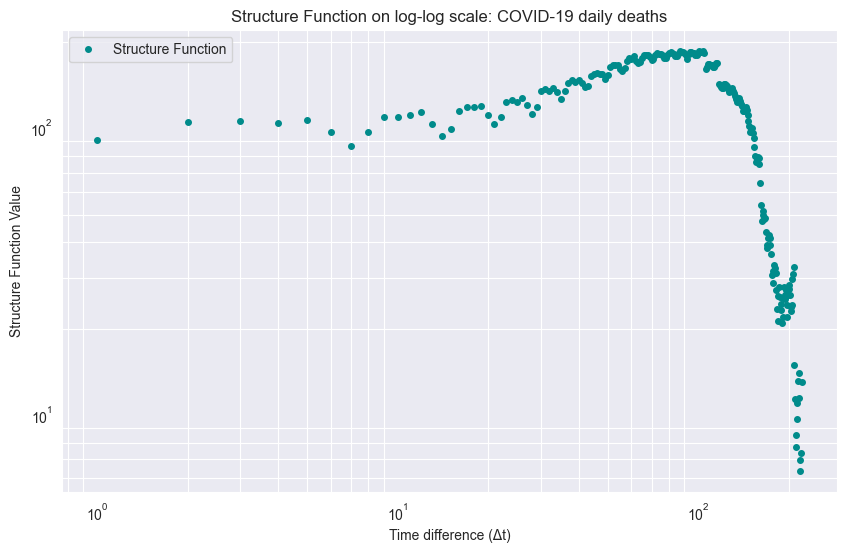

In [21]:
# Plot
delta_ts, SF_values = structure_function(t_daily_deaths, y_daily_deaths)
plt.figure(figsize=(10, 6))
plt.loglog(delta_ts, SF_values, 'o', label='Structure Function', color="darkcyan",  ms=4)
plt.xlabel('Time difference (Δt)')
plt.ylabel('Structure Function Value')
plt.title('Structure Function on log-log scale: COVID-19 daily deaths')
plt.grid(which='both')
plt.legend()
plt.show()

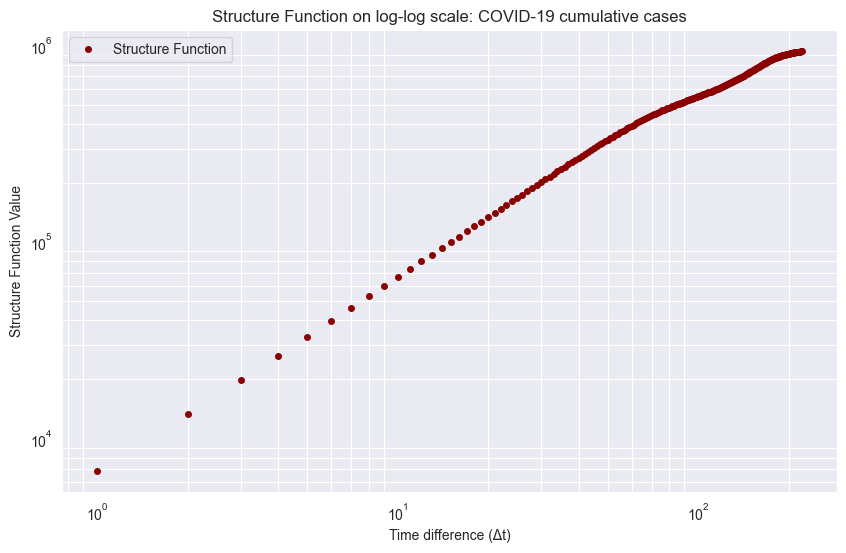

In [22]:
# Plot
delta_ts, SF_values = structure_function(t_cumulative_cases, y_cumulative_cases)

plt.figure(figsize=(10, 6))
plt.loglog(delta_ts, SF_values, 'o', label='Structure Function', color="darkred",  ms=4)
plt.xlabel('Time difference (Δt)')
plt.ylabel('Structure Function Value')
plt.title('Structure Function on log-log scale: COVID-19 cumulative cases')
plt.grid(which='both')
plt.legend()
plt.show()

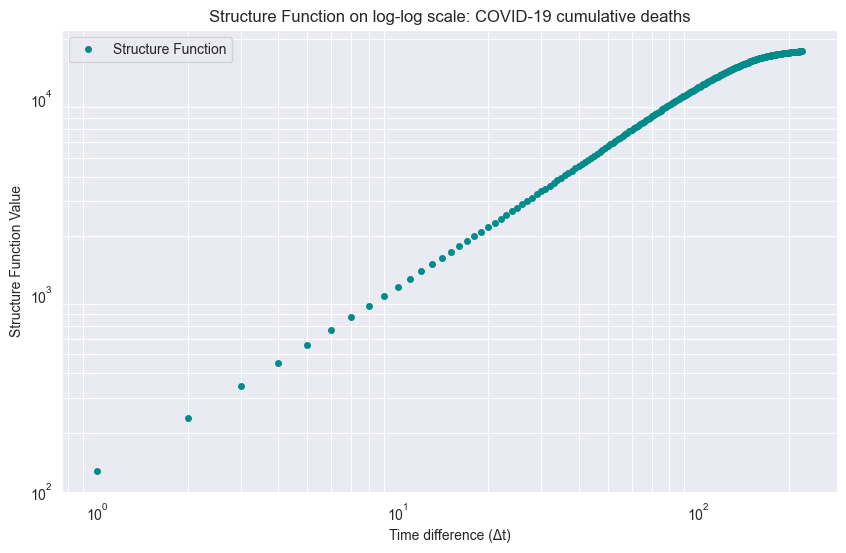

In [23]:
# Plot
delta_ts, SF_values = structure_function(t_cumulative_deaths, y_cumulative_deaths)

plt.figure(figsize=(10, 6))
plt.loglog(delta_ts, SF_values, 'o', label='Structure Function', color="darkcyan",  ms=4)
plt.xlabel('Time difference (Δt)')
plt.ylabel('Structure Function Value')
plt.title('Structure Function on log-log scale: COVID-19 cumulative deaths')
plt.grid(which='both')
plt.legend()
plt.show()

### Binned structure function

In [24]:
def structure_function_binned(t, y, n_bins=50):
    n = len(t)
    delta_t = []
    structure_fun = []

    # Loop over all pairs of data points
    for i in range(n):
        for j in range(i+1, n):
            dt = abs(t[j] - t[i])
            dy = y[j] - y[i]

            delta_t.append(dt)
            structure_fun.append(dy**2)

    # Logarithmic binning
    bins = np.logspace(np.log10(min(delta_t)), np.log10(max(delta_t)), n_bins)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    binned_sf = []

    for i in range(n_bins - 1):
        indices = (delta_t >= bins[i]) & (delta_t < bins[i+1])
        if np.sum(indices) > 0:
            mean_sf_for_bin = np.sqrt(np.mean(np.array(structure_fun)[indices]))
            binned_sf.append(mean_sf_for_bin)
        else:
            binned_sf.append(np.nan)  # No data in this bin

    return bin_centers, binned_sf

Apply the binned function do daily cases data:

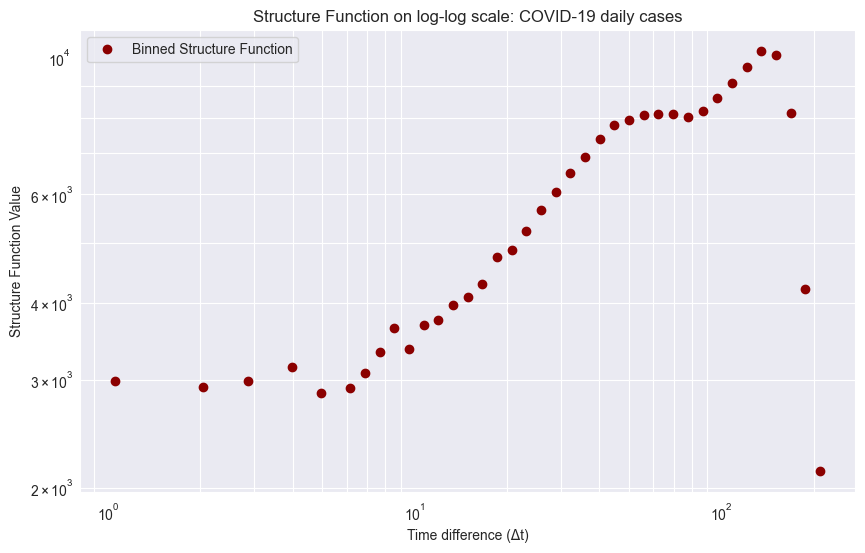

In [25]:
delta_tb, SF_b = structure_function_binned(t_daily_cases, y_daily_cases)
# Plot
plt.figure(figsize=(10, 6))
plt.loglog(delta_tb, SF_b, 'o', label='Binned Structure Function', color="darkred")
plt.xlabel('Time difference (Δt)')
plt.ylabel('Structure Function Value')
plt.title('Structure Function on log-log scale: COVID-19 daily cases')
plt.grid(which='both')
plt.legend()
plt.show()

Apply the function to COVID-19 daily deaths:

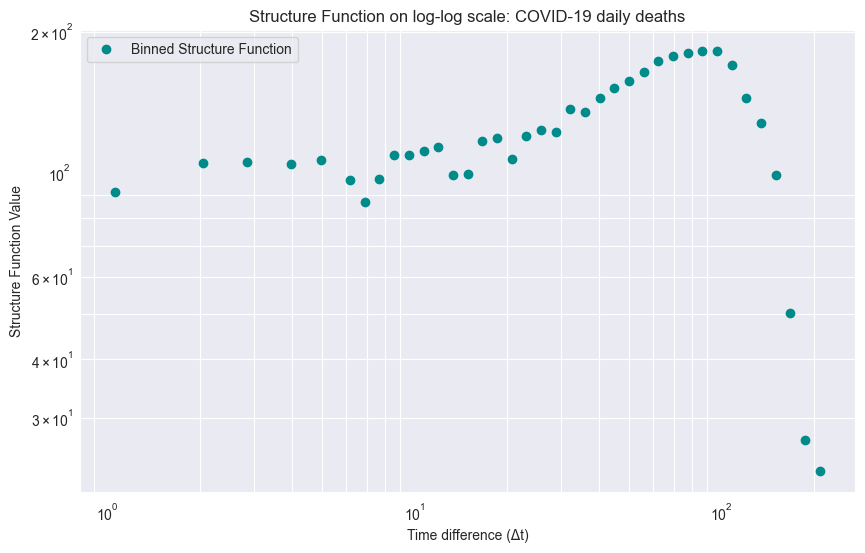

In [26]:
delta_tb, SF_b = structure_function_binned(t_daily_deaths, y_daily_deaths)
plt.figure(figsize=(10, 6))
plt.loglog(delta_tb, SF_b, 'o', label='Binned Structure Function', color="darkcyan")
plt.xlabel('Time difference (Δt)')
plt.ylabel('Structure Function Value')
plt.title('Structure Function on log-log scale: COVID-19 daily deaths')
plt.grid(which='both')
plt.legend()
plt.show()

### Bispectrum Analysis
- identification of non-linear relationships in the data
- predominant peak suggests non-linear relationships at the given frequencies


In [27]:
interpolation_function = interp1d(t_daily_cases, y_daily_cases, kind='cubic')
t_even = np.linspace(t_daily_cases.min(), t_daily_cases.max(), len(t_daily_cases))
y_even = interpolation_function(t_even)

In [28]:
# Define bispectrum function:
def bispectrum(y, freq_bins=30):
    Y = fft(y)
    n = len(Y)
    bisp = np.zeros((freq_bins, freq_bins), dtype=complex)

    for f1 in range(freq_bins):
        for f2 in range(freq_bins):
            bisp[f1, f2] = Y[f1] * Y[f2] * np.conjugate(Y[(f1 + f2) % n])
    return bisp

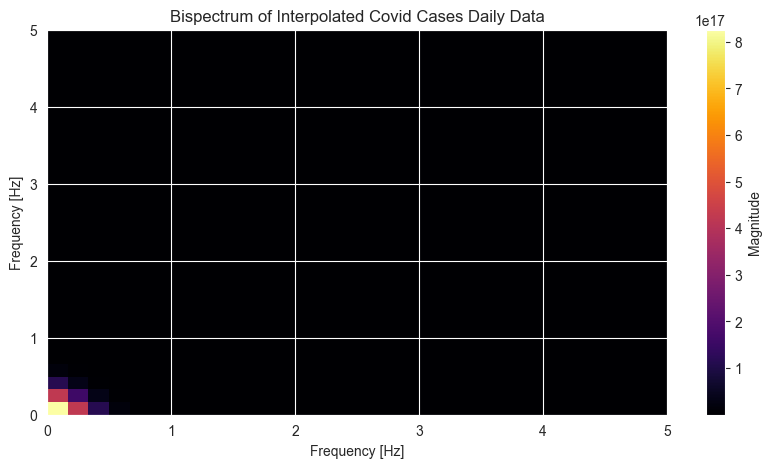

In [29]:
bisp_int = bispectrum(y_even)

plt.figure(figsize=(10, 5))
plt.imshow(np.abs(bisp_int), extent=(0, 5, 0, 5), aspect='auto', origin='lower',cmap="inferno")
plt.colorbar(label='Magnitude')
plt.title('Bispectrum of Interpolated Covid Cases Daily Data')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Frequency [Hz]')
plt.grid(True)
plt.show()

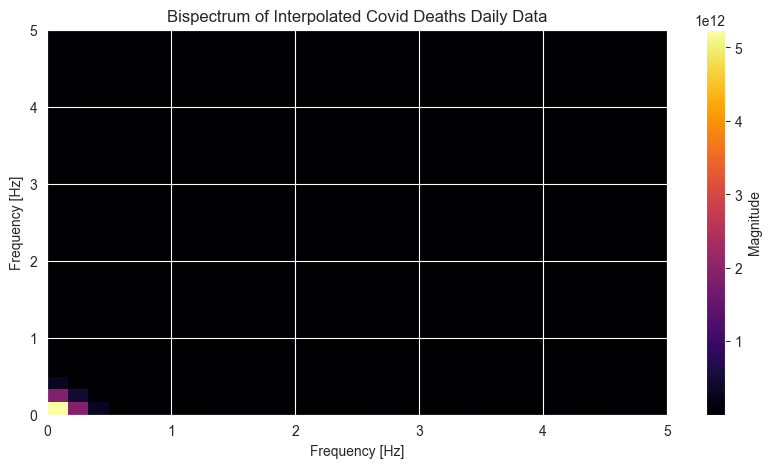

In [30]:
interpolation_function = interp1d(t_daily_deaths, y_daily_deaths, kind='cubic')
t_even = np.linspace(t_daily_deaths.min(), t_daily_deaths.max(), len(t_daily_deaths))
y_even = interpolation_function(t_even)

bisp_int = bispectrum(y_even)

plt.figure(figsize=(10, 5))
plt.imshow(np.abs(bisp_int), extent=(0, 5, 0, 5), aspect='auto', origin='lower', cmap="inferno")
plt.colorbar(label='Magnitude')
plt.title('Bispectrum of Interpolated Covid Deaths Daily Data')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Frequency [Hz]')
plt.grid(True)
plt.show()

Minimum magnitude: 428778993.9478515
Maximum magnitude: 5240822553000.0


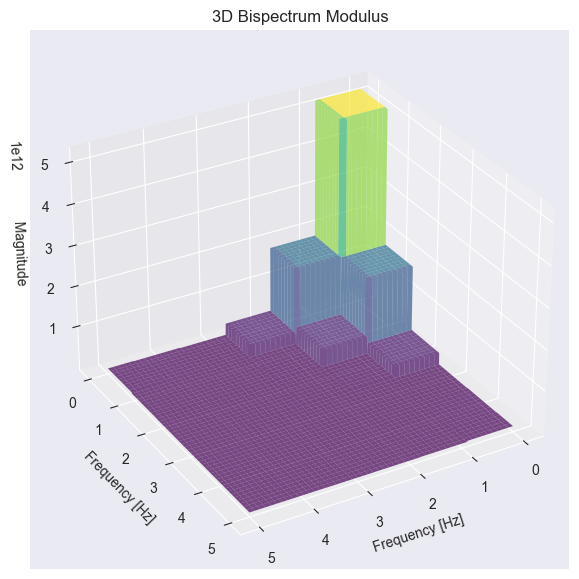

In [31]:
# from mpl_toolkits.mplot3d import Axes3D

# ... [Previous code for light curve generation, interpolation, etc.]

def bispectrum(y, max_freq=0.5, freq_bins=100):
    Y = fft(y)
    n = len(Y)
    bisp = np.zeros((freq_bins, freq_bins), dtype=complex)
    freq_values = np.linspace(0, max_freq, freq_bins)
    bin_width = n * max_freq / freq_bins

    for i, f1 in enumerate(freq_values):
        for j, f2 in enumerate(freq_values):
            index1 = int(f1 * bin_width)
            index2 = int(f2 * bin_width)
            bisp[i, j] = Y[index1] * Y[index2] * np.conjugate(Y[int((index1 + index2) % n)])

    return freq_values, bisp

freq_values, bisp = bispectrum(y_even, max_freq=5, freq_bins=1000)

# Ensure the magnitude values are within expected range
magnitude = np.abs(bisp)
print(f"Minimum magnitude: {magnitude.min()}")
print(f"Maximum magnitude: {magnitude.max()}")

# 3D Plotting of bispectrum modulus
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(freq_values, freq_values)
Z = magnitude

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.7)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Frequency [Hz]')
ax.set_zlabel('Magnitude')
ax.set_title('3D Bispectrum Modulus')
ax.view_init(30, 60)  # Adjust view angle for

#### 5. Multifractal Detrended Fluctuation Analysis (MFDFA)

C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\.venv3.10\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\.venv3.10\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Estimated H = 0.509


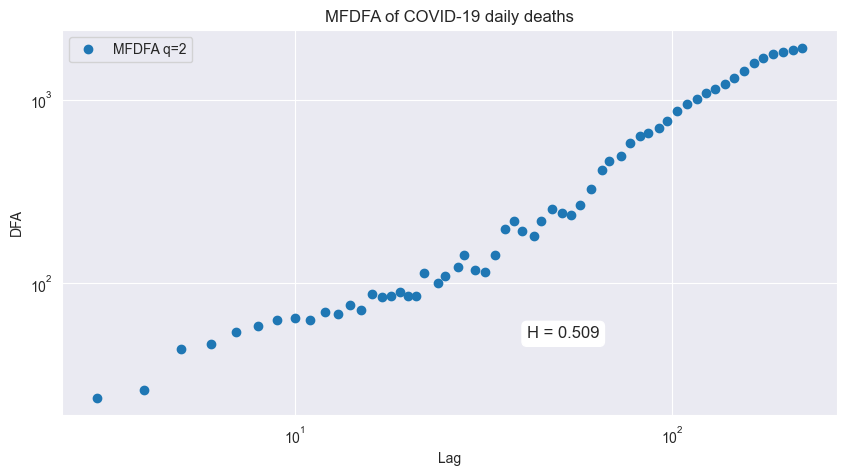

In [32]:
# Data array
y_uneven = y_daily_deaths.to_numpy()

# Select a band of lags
lag = np.unique(np.logspace(0.5, 3, 100).astype(int))

# Power q
q = 2

# Polynomial fitting order
order = 1

# Compute MFDFA
lag, dfa = MFDFA(y_uneven, lag=lag, q=q, order=order)

# Plotting log-log MFDFA results
plt.figure(figsize=(10,5))
plt.loglog(lag, dfa, 'o', label='MFDFA q=2')

# Fitting line to estimate Hurst index
slope, intercept = np.polyfit(np.log(lag)[4:20], np.log(dfa)[4:20], 1)
H_hat = slope[0]
print(f'Estimated H = {H_hat:.3f}')

# Annotating the Hurst index on the plot
plt.annotate(f'H = {H_hat:.3f}', xy=(0.6, 0.2), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round", fc="w"))
plt.title('MFDFA of COVID-19 daily deaths')
plt.xlabel('Lag')
plt.ylabel('DFA')
plt.grid(True)
plt.legend()
plt.show()

H value around 0.5 indicates pure random process?
This analysis would make more sense if COVID-19 data was collected over several peaks.
For one peak, we do not expect multifractality in the data

In [33]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False

colours = ['#660022','#003300','#cc3300']

C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\.venv3.10\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: divide by zero encountered in divide
  ret = um.true_divide(


1.0 3.25 4.825 6.175 7.525 9.775


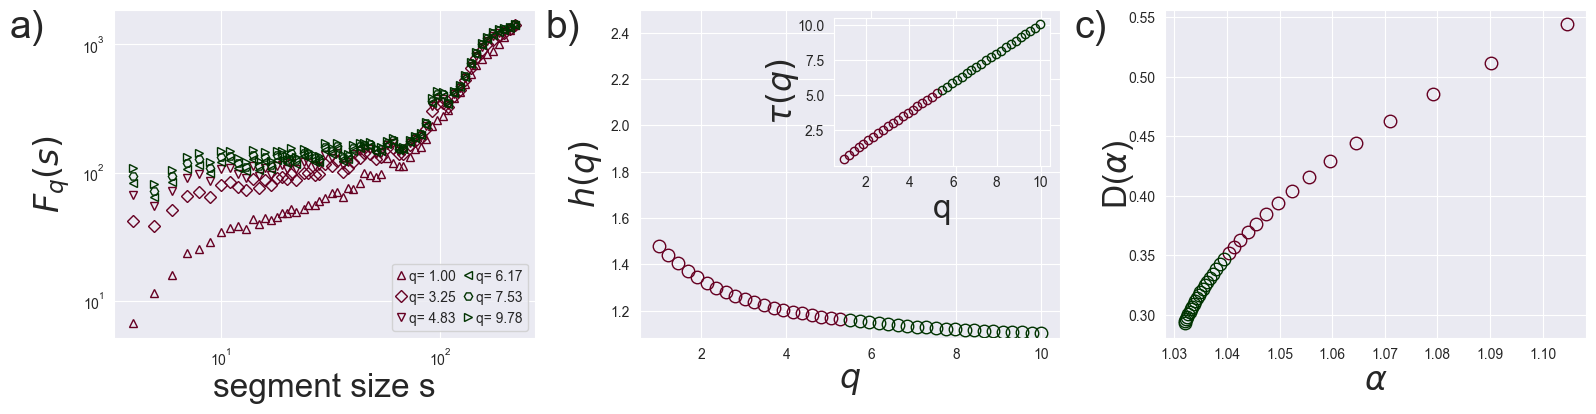

In [34]:
lag = np.unique(np.logspace(0.5, 3, 100).astype(int))
q_list = np.linspace(1,10,41)
q_list = q_list[q_list!=0.0]
lag, dfa_sun =  MFDFA(y_uneven, lag, q=q_list, order=2)
print(q_list[0], q_list[10],q_list[17],q_list[23],q_list[29], q_list[39])
# %% ################################## FIG03 ##################################
fig, ax = plt.subplots(1,3, figsize=(16,4))

ax[0].loglog(lag[:], dfa_sun[:,[0]],  '^', markersize=6, markerfacecolor='none',
             color=colours[0], label=f'q= {q_list[0]:.2f}')
ax[0].loglog(lag[:], dfa_sun[:,[10]], 'D', markersize=6, markerfacecolor='none',
             color=colours[0], label=f'q= {q_list[10]:.2f}')
ax[0].loglog(lag[:], dfa_sun[:,[17]], 'v', markersize=6, markerfacecolor='none',
             color=colours[0], label=f'q= {q_list[17]:.2f}')
ax[0].loglog(lag[:], dfa_sun[:,[23]], '<', markersize=6, markerfacecolor='none',
             color=colours[1], label=f'q= {q_list[23]:.2f}')
ax[0].loglog(lag[:], dfa_sun[:,[29]], 'H', markersize=6, markerfacecolor='none',
             color=colours[1], label=f'q= {q_list[29]:.2f}')
ax[0].loglog(lag[:], dfa_sun[:,[39]], '>', markersize=6, markerfacecolor='none',
             color=colours[1], label=f'q= {q_list[39]:.2f}')

ax[0].set_ylabel(r'$F_q(s)$',labelpad=7,fontsize=24)
ax[0].set_xlabel(r'segment size s',labelpad=3,fontsize=24)

slopes_s1 = np.polynomial.polynomial.polyfit(np.log(lag)[20:55],np.log(dfa_sun)[20:55],1)[1]

ax[1].plot(q_list[:20], slopes_s1[:20],'o', markersize=9,
           markerfacecolor='none', color=colours[0])
ax[1].plot(q_list[20:], slopes_s1[20:],'o', markersize=9,
           markerfacecolor='none', color=colours[1])

ax[1].set_ylim([None,2.5])
ax[1].set_ylabel(r'$h(q)$',labelpad=5,fontsize=24)
ax[1].set_xlabel(r'$q$',labelpad=3,fontsize=24)

axi2 = fig.add_axes([0.52, 0.6, 0.135, .37])
axi2.plot(q_list[:20], q_list[:20]*slopes_s1[:20]-1,'o', markersize=6,
          color=colours[0], markerfacecolor='none')
axi2.plot(q_list[20:], q_list[20:]*slopes_s1[20:]-1,'o', markersize=6,
          color=colours[1], markerfacecolor='none')

axi2.set_xlabel(r'q',labelpad=3,fontsize=24)
axi2.set_ylabel(r'$\tau(q)$',labelpad=-3,fontsize=24)


t_sun = q_list * slopes_s1 - 1
hq_sun = np.gradient(t_sun) / np.gradient(q_list)
f_sun = q_list * hq_sun - t_sun

ax[2].plot(hq_sun[5:20], f_sun[5:20],'o', markersize=9,
           markerfacecolor='none', color=colours[0])
ax[2].plot(hq_sun[20:], f_sun[20:],'o', markersize=9,
           markerfacecolor='none', color=colours[1])

ax[2].set_xlabel(r'$\alpha$',labelpad=3,fontsize=24)
ax[2].set_ylabel(r'D($\alpha$)',labelpad=-5,fontsize=24)

ax[0].legend(loc=4, handletextpad=.3, handlelength=.5, ncol=2,
             columnspacing=.65)

locmaj = matplotlib.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax[0].yaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax[0].yaxis.set_minor_locator(locmin)
ax[0].yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

fig.text(.005, .92, r'a)', fontsize=28)
fig.text(.34, .92, r'b)', fontsize=28)
fig.text(.67, .92, r'c)', fontsize=28)

fig.subplots_adjust(left=.07, bottom=.17, right=.99, top=.99, hspace=.06,
                    wspace=.25)